In [122]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

total_cost_path = "output_cost_of_living_states copy"
cost_breakdown_path = "output_expense_breakdown_states copy"

total_cost = pd.read_csv(total_cost_path)
cost_breakdown = pd.read_csv(cost_breakdown_path)

In [150]:
#total_cost.groupby(["state"])["city"]
by_state_df = total_cost.groupby("state")
by_state_df.get_group("Georgia")

,city,Expenses_outside_CC,Avg. Monthly Salary,Expense/Income,Exp_Category,state
7,Atlanta,3118.00,4878.17,0.64,More_Exp,Georgia
120,Savannah,2675.68,4341.67,0.62,Less_Exp,Georgia
180,Macon,2178.98,5166.67,0.42,Least_Exp,Georgia
259,Valdosta,1792.20,3462.67,0.52,Least_Exp,Georgia
277,Alpharetta,3041.05,4738.00,0.64,Exp,Georgia


In [124]:
total_cost.sort_values("Expenses_outside_CC")

,city,Expenses_outside_CC,Avg. Monthly Salary,Expense/Income,Exp_Category,state
118,Shreveport,1488.30,2300.80,0.65,Least_Exp,Louisiana
275,Dubuque,1538.72,6250.00,0.25,Least_Exp,Iowa
267,Sumter,1553.79,2500.00,0.62,Least_Exp,South Carolina
251,Suffolk,1578.40,2500.00,0.63,Least_Exp,Virginia
299,Russellville,1613.79,3333.33,0.48,Least_Exp,Arkansas
...,...,...,...,...,...,...
222,Mountain View,5224.23,7404.00,0.71,Most_Exp,California
0,New York,5388.32,5944.31,0.91,Most_Exp,New York
255,Redwood City,5602.88,7186.00,0.78,Most_Exp,California
246,Boca Raton,5955.84,6172.00,0.96,Most_Exp,Florida


In [125]:
by_exp_group = total_cost.groupby("Exp_Category")
most_expensive = by_exp_group.get_group("Most_Exp").sort_values("Expenses_outside_CC")
most_expensive_50 = most_expensive.tail(50)
most_expensive_50.tail()
#most expensive city = Key West, Florida

,city,Expenses_outside_CC,Avg. Monthly Salary,Expense/Income,Exp_Category,state
222,Mountain View,5224.23,7404.00,0.71,Most_Exp,California
0,New York,5388.32,5944.31,0.91,Most_Exp,New York
255,Redwood City,5602.88,7186.00,0.78,Most_Exp,California
246,Boca Raton,5955.84,6172.00,0.96,Most_Exp,Florida
303,Key West,8098.69,4683.33,1.73,Most_Exp,Florida


In [149]:
least_expensive = by_exp_group.get_group("Least_Exp").sort_values("Expenses_outside_CC")
least_expensive_50 = least_expensive.head(50)
least_expensive_50.head()
#least expensive city = Shreveport, Louisiana

,city,Expenses_outside_CC,Avg. Monthly Salary,Expense/Income,Exp_Category,state
118,Shreveport,1488.30,2300.80,0.65,Least_Exp,Louisiana
275,Dubuque,1538.72,6250.00,0.25,Least_Exp,Iowa
267,Sumter,1553.79,2500.00,0.62,Least_Exp,South Carolina
251,Suffolk,1578.40,2500.00,0.63,Least_Exp,Virginia
299,Russellville,1613.79,3333.33,0.48,Least_Exp,Arkansas


Text(0.5, 1.0, 'Top 50 Most Expensive Cities and Their States')

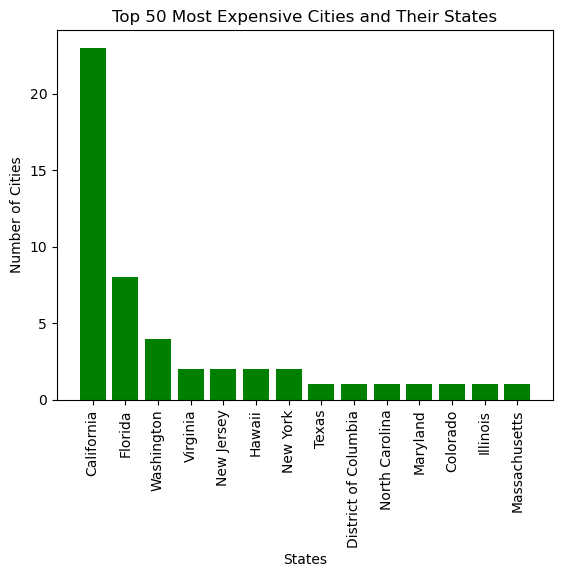

In [127]:
states_in_most_exp_50 = most_expensive_50["state"].value_counts()
x_axis = states_in_most_exp_50.index.values
y_axis = states_in_most_exp_50.values

plt.bar(x_axis, y_axis, color="g", alpha=1, align="center")
plt.xticks(rotation="vertical")
plt.xlabel("States")
plt.ylabel("Number of Cities")
plt.title("Top 50 Most Expensive Cities and Their States")

Text(0.5, 1.0, 'Top 50 Least Expensive Cities and Their States')

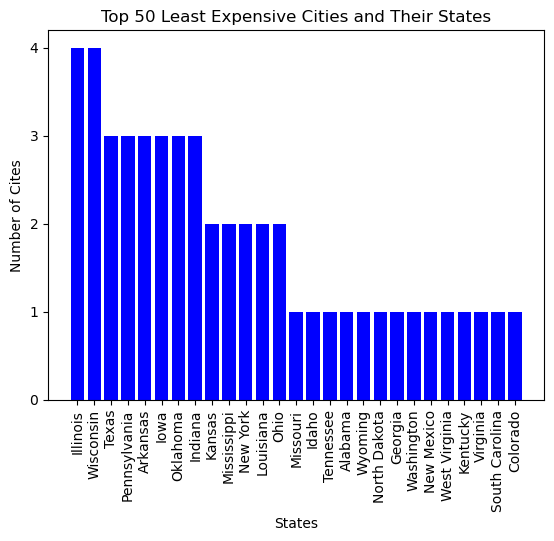

In [128]:
#I don't like this one
states_in_least_exp_50 = least_expensive_50["state"].value_counts()
x_axis = states_in_least_exp_50.index.values
y_axis = states_in_least_exp_50.values

plt.bar(x_axis, y_axis, color="b", alpha=1, align="center")
plt.xticks(rotation="vertical")
plt.yticks(np.arange(0, 5, 1))
plt.xlabel("States")
plt.ylabel("Number of Cites")
plt.title("Top 50 Least Expensive Cities and Their States")

Text(0.5, 1.0, 'Cost breakdown in Key West, Florida')

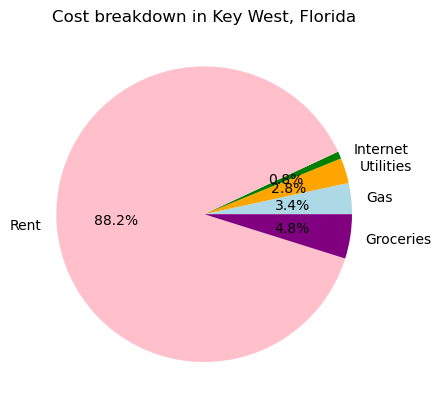

In [152]:
key_west = cost_breakdown.loc[[303]]
#key_west

labels = ["Gas", "Utilities", "Internet", "Rent", "Groceries"]
sizes = [273.6, 222.0, 63.5, 7093.33, 389.76]
colors = ["lightblue", "orange", "green", "pink", "purple"]
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("Cost breakdown in Key West, Florida")

Text(0.5, 1.0, 'Cost breakdown in Dubuque, Iowa')

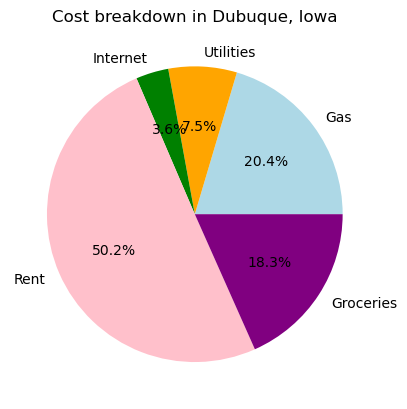

In [153]:
dubuque = cost_breakdown.loc[[275]]
#dubuque

labels = ["Gas", "Utilities", "Internet", "Rent", "Groceries"]
sizes = [304.8, 111.67, 53.33, 750.0, 273.92]
colors = ["lightblue", "orange", "green", "pink", "purple"]
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("Cost breakdown in Dubuque, Iowa")

Text(0.5, 1.0, 'Cost breakdown in Atlanta, Georgia')

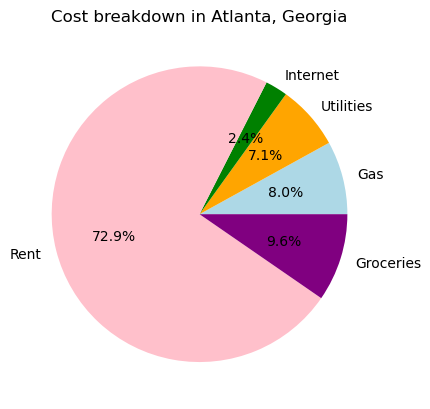

In [154]:
atlanta = cost_breakdown.loc[[7]]
#atlanta

labels = ["Gas", "Utilities", "Internet", "Rent", "Groceries"]
sizes = [242.4, 213.22, 73.7, 2203.08, 290.6]
colors = ["lightblue", "orange", "green", "pink", "purple"]
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("Cost breakdown in Atlanta, Georgia")

<AxesSubplot:xlabel='Avg. Monthly Salary', ylabel='3 bed aptt outside Center'>

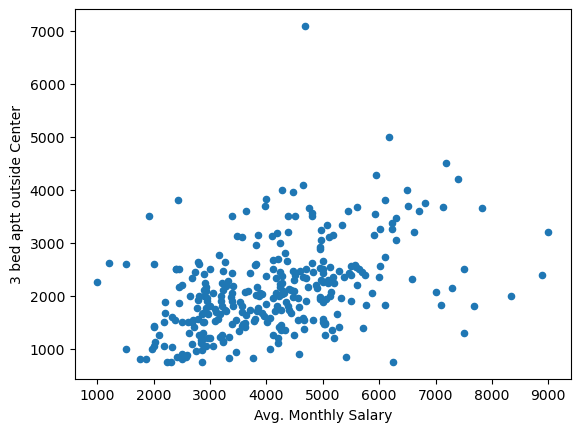

In [157]:
cost_breakdown.plot(kind="scatter", x="Avg. Monthly Salary", y="3 bed aptt outside Center", marker="o")

<BarContainer object of 43 artists>

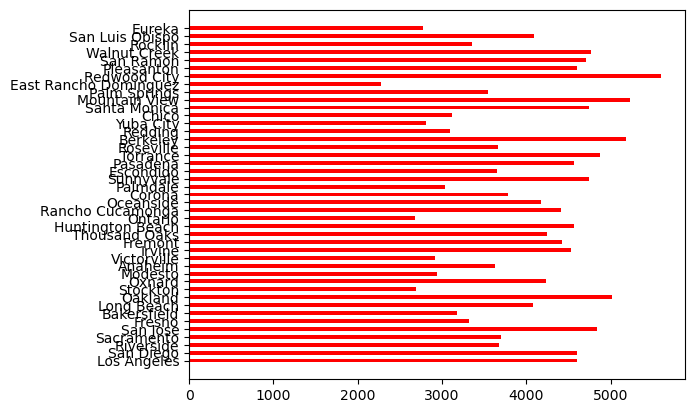

In [191]:
by_state_df = total_cost.groupby("state")
california = by_state_df.get_group("California")

x_axis = california["city"]
y_axis = california["Expenses_outside_CC"]

plt.barh(x_axis, y_axis, color="r", height=0.5, alpha=1, align="center")

In [215]:
most_expensive_5 = cost_breakdown.loc[[222, 0, 255, 246, 303]]
most_expensive_5_df = pd.DataFrame(most_expensive_5)
least_expensive_5 = cost_breakdown.loc[[118, 275, 267, 251, 299]]
least_expensive_5_df = pd.DataFrame(least_expensive_5)
most_and_least_exp_5 = pd.concat([least_expensive_5_df, most_expensive_5_df])
most_and_least_exp_5

,Unnamed: 0,city,Country,Monthly Transp Pass,Gas/liter,Utilities,Internet,3 bed aptt in City Center,3 bed aptt outside Center,Avg. Monthly Salary,Total_Grocery_Monthly,Expenses_outside_CC,Expense/Income,Exp_Category,state
118,147,Shreveport,United States,40.0,264.0,150.00,66.70,900.00,750.00,2300.80,217.60,1488.30,0.65,Least_Exp,Louisiana
275,611,Dubuque,United States,45.0,304.8,111.67,53.33,1200.00,750.00,6250.00,273.92,1538.72,0.25,Least_Exp,Iowa
267,594,Sumter,United States,20.0,254.4,186.67,56.66,662.50,812.50,2500.00,223.56,1553.79,0.62,Least_Exp,South Carolina
251,540,Suffolk,United States,30.0,295.2,90.00,50.00,1100.00,900.00,2500.00,213.20,1578.40,0.63,Least_Exp,Virginia
299,793,Russellville,United States,50.0,244.8,193.33,66.22,950.00,820.00,3333.33,239.44,1613.79,0.48,Least_Exp,Arkansas
222,369,Mountain View,United States,83.4,350.4,165.70,68.33,4200.00,4200.00,7404.00,356.40,5224.23,0.71,Most_Exp,California
0,0,New York,United States,129.0,309.6,180.61,69.77,7146.84,4279.34,5944.31,420.00,5388.32,0.91,Most_Exp,New York
255,551,Redwood City,United States,74.0,400.8,141.67,62.33,5100.00,4500.00,7186.00,424.08,5602.88,0.78,Most_Exp,California
246,523,Boca Raton,United States,50.0,302.4,219.39,77.37,5250.00,5000.00,6172.00,306.68,5955.84,0.96,Most_Exp,Florida
303,819,Key West,United States,56.5,273.6,222.00,63.50,8333.33,7093.33,4683.33,389.76,8098.69,1.73,Most_Exp,Florida


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

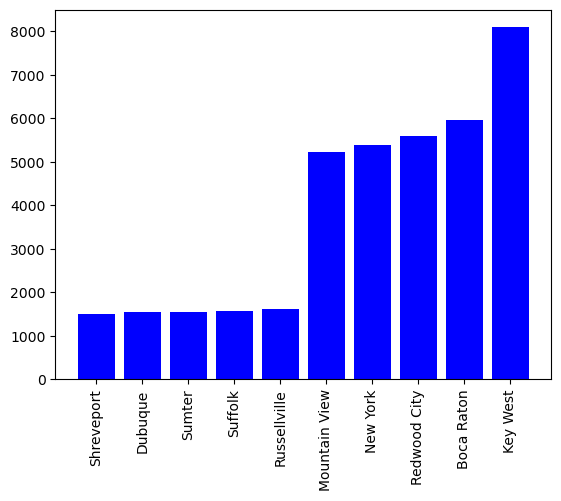

In [217]:
x_axis = most_and_least_exp_5["city"]
y_axis = most_and_least_exp_5["Expenses_outside_CC"]

plt.bar(x_axis, y_axis, color="b", align="center")
plt.xticks(rotation="vertical")